In [2]:
import numpy as np
import pandas as pd 

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10,7

import sys
sys.path.append('../src')

## Data Preparation

- Download the data from: http://www.kibot.com/buy.aspx at the: "Free historical data for your data quality analysis" section
- We have the data from the WDC stock and the iShares IVE ETF: https://www.ishares.com/us/products/239728/ishares-sp-500-value-etf 

#### Tick Data info from kibot
- http://www.kibot.com/support.aspx#data_format
- The order of the fields in the tick files (with bid/ask prices) is: Date,Time,Price,Bid,Ask,Size. 
- The bid/ask prices are recorded whenever a trade occurs and they represent the "national best bid and offer" (NBBO) prices across multiple exchanges and ECNs.
- For each trade, current best bid/ask values are recorded together with the transaction price and volume. Trade records are not aggregated and all transactions are included in their consecutive order.
- The order of fields in our regular tick files (without bid/ask) is: Date,Time,Price,Size.
- The order of fields in our 1, 5 or 10 second files is: Date,Time,Open,High,Low,Close,Volume. It is the same format used in our minute files.
- The stocks and ETFs data includes pre-market (8:00-9:30 a.m. ET), regular (9:30 a.m.-4:00 p.m. ET.) and after market (4:00-6:30 p.m. ET) sessions.
- Trading for SPY (SPDR S&P 500 ETF) and some other liquid ETFs and stocks usually starts at 4 a.m and ends at 8 p.m. ET.

___

In [31]:
def prepare_data_kibot(raw_data_path, out_data_path):
    df = pd.read_csv(raw_data_path,
                     header=None,
                     names=['day', 'time', 'price', 'bid', 'ask', 'vol'])
    df['date'] = pd.to_datetime(df['day'] + df['time'],
                                format='%m/%d/%Y%H:%M:%S')
    df['dollar_vol'] = df['price']*df['vol']
    df = df.set_index('date')
    df = df.drop(['day', 'time'],
                 axis=1)
    df = df.drop_duplicates()
    df.to_parquet(out_data_path)

In [32]:
raw_data_path = '../data/raw/IVE_tickbidask_new.txt'
out_data_path = '../data/interim/IVE_tickbidask.parq'
prepare_data_kibot(raw_data_path, out_data_path)

In [33]:
raw_data_path = '../data/raw/WDC_tickbidask.txt'
out_data_path = '../data/interim/WDC_tickbidask.parq'
prepare_data_kibot(raw_data_path, out_data_path)

### Data Cleaning
___

In [36]:
#out_data_path = '../data/interim/WDC_tickbidask.parq'
out_data_path = '../data/interim/IVE_tickbidask.parq'
df = pd.read_parquet(out_data_path)

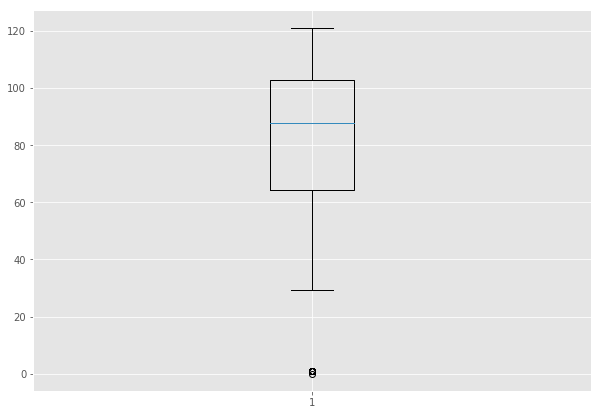

In [37]:
fig, ax = plt.subplots()
_ = ax.boxplot(df.price)

In [38]:
from data.clean_data import mad_outlier
mad = mad_outlier(df.price.values)

In [39]:
print(mad.sum())

11


In [40]:
### drop the incorrect rows
df = df.loc[~mad]

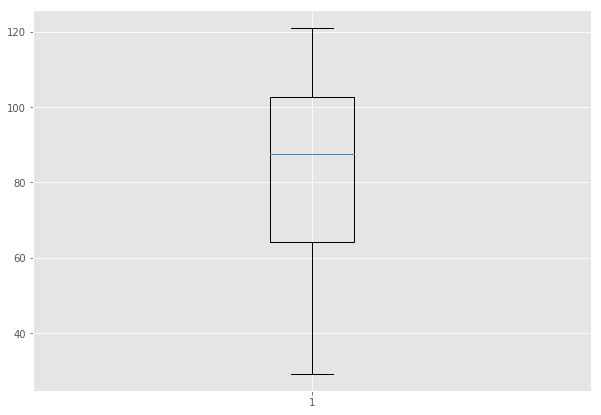

In [41]:
fig, ax = plt.subplots()
_ = ax.boxplot(df.price)

In [42]:
#clean_data_path = '../data/processed/clean_WDC_tickbidask.parq'
clean_data_path = '../data/processed/clean_IVE_tickbidask.parq'
df.to_parquet(clean_data_path)

### Test clean data loading

In [43]:
clean_data_path = '../data/processed/WDC_tickbidask.parq'
clean_data_path = '../data/processed/clean_IVE_tickbidask.parq'
df = pd.read_parquet(clean_data_path)

In [44]:
df.head()

,price,bid,ask,vol,dollar_vol
date,,,,,
2009-09-28 09:30:00,50.79,50.70,50.79,100,5079.00
2009-09-28 09:30:00,50.71,50.70,50.79,638,32352.98
2009-09-28 09:31:32,50.75,50.75,50.76,100,5075.00
2009-09-28 09:31:33,50.75,50.72,50.75,100,5075.00
2009-09-28 09:31:50,50.75,50.73,50.76,300,15225.00
